# Maternal Health Risk Data

Тема: анализ медицинских показателей беременных женщин(1014 пациенток), у которых разные риски для здоровья 
Исследовательская задача: установить закономерности влияния различных медицинских показателей на здоровье беременных 

1. Age: возраст, когда пациентка забеременела - количественное непрерывное 
2. SystolicBP: верхнее значение артериального давления в мм рт. ст. - количественное непрерывное
3. DiastolicBP: нижнее значение артериального  давления в мм рт. ст. - количественнное непрерывное 
4. BS: уровень глюкозы в крови в ммоль/л - количественное непрерывное 
5. HeartRate: нормальная частота сердечных сокращений в состоянии покоя в ударах в минуту - количественное непрерывное 
6. BodyTemp - температура тела по фаренгейту - количественное непрерывное 
7. Risk Level: прогнозируемый риск здоровью ('high risk' - высокий, 'mid risk' - средний, 'low risk' - низкий) - категориальное порядковое 

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
data.iloc[2,3]

8.0

# Этап 2

## Фильтрация 

Рассмотрим, у скольких пациенток есть риск для здоровья (высокий или средний)

In [167]:
data[(data['RiskLevel'] == 'high risk')|(data['RiskLevel'] == 'mid risk')].shape[0]

608

59,9% беременных пациенток имеют ту или иную степень риск для здоровья. 

Гипотеза 1: Возраст женщины может стать фактором риска. 

In [168]:
data[data['Age'] >= 35].shape[0]

318

В нашем датасете 31,4% беременных в возрасте 35 и более лет (термин "старородящие"). 

In [169]:
data[(data['Age'] >= 35)
     &((data['RiskLevel'] == 'mid risk') 
     | (data['RiskLevel'] == 'high risk'))].shape[0]

225

Больше половины женщин 35 и старше лет (225 из 318) имеют риски для здоровья. Можно сделать вывод, что возраст во время беременности может сыграть роль в ухудшении здоровья. В дальнейшем мы рассмотрим этот фактор в сочетании с другими, чтобы выявить закономерности.

Гипотеза 2: Артериальное давление - важный показатель во время беременности. Высокий или средний риск здоровья должен быть у женщин с высоким давлением (верхний и нижний показатели больше 139/89). При этом у женщин с пониженным давлением (показатели больше 105/60) также есть риск для здоровья, так как прогрессирует гипотония. 

In [170]:
data[((data['SystolicBP'] < 139)
      &(data['DiastolicBP'] < 89))
      &((data['SystolicBP'] > 105)
      &(data['DiastolicBP'] > 60))].shape[0]

347

У нас 34,2% женщин с нормальным давлением. Это очень маленькое количество, уже на этом этапе мы можем говорить о том, что у беременных женщин развивается гипотония или гипертония, и это распространенное явление. Осталось понять, как это влияет на риски для здоровья. 

In [171]:
data[(data['SystolicBP'] < 105) & (data['DiastolicBP'] < 60)].shape[0]

49

49 женщин страдают от пониженного давления. Посмотрим, приводит ли к это рискам для здоровья. 

In [172]:
data[(data['RiskLevel'] == 'low risk')
     &((data['SystolicBP'] < 105)
     &(data['DiastolicBP'] < 60))].shape[0]

41

У 41 женщины из 49 ставят низкий риск для здоровья при условиях пониженном артериальном давлении. Часть нашей гипотезы не подтвердилась 

Посмотрим то же самое, только для высокого давления.

In [173]:
data[(data['SystolicBP'] > 139) & (data['DiastolicBP'] > 89)].shape[0]

117

Интересное наблюдение. У нас мало женщин с высоким давлением: 117 человек. Суммируя количество женщин с нормальным, низким и высоким давлениям по нашим условиям мы не получаем результат в 1014 человек. Получается, что есть другие "комбинации" показателей давления, которые не удовлетворяют нашим условимя. 

In [174]:
data[(data['RiskLevel'] == 'low risk')
     &((data['SystolicBP'] > 139)
     &(data['DiastolicBP'] > 89))].shape[0]

0

Тем не менее, абсолютно все женщины с высоким давлением имеют риски для здоровья(фильтрация по "низкому уровню риска" равна нулю). Эта часть гипотезы абсолютно подтвердилась. 

Разумеется, что лишь давление не может привести к высокому риску для здоровья. **Гипотеза 3**: у женщин с высоким давлением есть сахарный диабет (уровень глюкозы 7 и больше) и следовательно, высокий риск для здоровья. 

In [175]:
data[(data['RiskLevel'] == 'high risk')
     &((data['SystolicBP'] > 139)
     &(data['DiastolicBP'] > 89)
     &(data['BS'] >= 7))].shape[0]

104

104 женщины из 117 с высоким давлением имеют и сахарный диабет, и высокий уровень риска для здоровья. Гипотеза подтверждена. Можно даже предположить принцип обозначения "среднего" и "высокого" риска для здоровья. Возможно, средний ставится, если проблемы есть по одному показателю, а высокий - по двум показателям. 

## Перекодирование переменных (для удобства)

Для удобства перекодируем переменную RiskLevel: 0 - low risk, 1 - mid risk, 2 - high risk

In [162]:
def risk_level_new(value):
    if value == 'low risk':
        value = 0
    elif value == 'mid risk':
        value = 1
    elif value == 'high risk':
        value = 2
    return value 

In [163]:
data['Risk_range'] = data['RiskLevel'].apply(risk_level_new)

Для того, чтобы нам лучше понимать переменную температуры, переведем Фаренгейты в Цельсия по формуле (5/9 (t °F - 32)

In [159]:
def temp_c(value):
    return round(5/9*(value - 32),2)
data['BodyTemp_C'] = data['BodyTemp'].apply(temp_c)

## Создание новой переменной 

Создадим переменную возрастной периодизации: дети (до 12 лет), несовершеннолетние подростки (12-17), 18-30, 30-55, пожилые люди(55-70)

In [2]:
def age_periodization(value):
    if value < 12:
        value = 'Дети'
    elif value >= 12 and value < 18:
        value = 'Несовершеннолетние' 
    elif value >= 18 and value <= 30:
        value = '18-30'
    elif value > 30 and value <= 40:
        value = '31-40'
    elif value > 40 and value <= 55:
        value = '41-55'
    elif value > 55:
        value = 'Пожилые люди'
    return value
    

In [4]:
data['Age'] 

0       25
1       35
2       29
3       30
4       35
        ..
1009    22
1010    55
1011    35
1012    43
1013    32
Name: Age, Length: 1014, dtype: int64

In [3]:
data['Age_periodization'] = data['Age'].apply(age_periodization)

## Сортировка

In [160]:
data.sort_values(by = 'Age')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_periodization,diabetes,BodyTemp_C
849,10,100,50,6.0,99.0,70,mid risk,Дети,0,37.22
19,10,70,50,6.9,98.0,70,low risk,Дети,0,36.67
670,10,100,50,6.0,99.0,70,mid risk,Дети,0,37.22
250,10,85,65,6.9,98.0,70,low risk,Дети,0,36.67
588,12,90,60,7.5,102.0,66,mid risk,Несовершеннолетние,1,38.89
...,...,...,...,...,...,...,...,...,...,...
435,65,130,80,15.0,98.0,86,high risk,Пожилые люди,1,36.67
339,65,120,90,6.9,103.0,76,low risk,Пожилые люди,0,39.44
322,65,90,60,6.9,98.0,70,low risk,Пожилые люди,0,36.67
326,66,85,60,6.9,98.0,86,low risk,Пожилые люди,0,36.67


Сортировка показала, что самым молодым беременным 10 лет. Таких пациенток четыре, при этом у 2 из них низкий риск для здоровья, а у двух средний риск и высокая температура тела (37,22). Сразу видна и самая взрослая беременная пациентка - ей 70 лет и у нее низкий риск для здоровья, при этом низкое давление, что удивительно для ее возраста. 

In [167]:
data.sort_values(by = ['Risk_range', 'BS'], ascending = [False, False])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_periodization,diabetes,BodyTemp_C,Risk_range
123,40,160,100,19.0,98.0,77,high risk,31-40,1,36.67,2
127,55,140,95,19.0,98.0,77,high risk,41-55,1,36.67,2
130,40,160,100,19.0,98.0,77,high risk,31-40,1,36.67,2
137,55,140,95,19.0,98.0,77,high risk,41-55,1,36.67,2
166,40,160,100,19.0,98.0,77,high risk,31-40,1,36.67,2
...,...,...,...,...,...,...,...,...,...,...,...
667,15,90,49,6.0,98.0,77,low risk,Несовершеннолетние,0,36.67,0
669,15,90,49,6.0,99.0,77,low risk,Несовершеннолетние,0,37.22,0
672,15,100,49,6.0,99.0,77,low risk,Несовершеннолетние,0,37.22,0
674,15,100,60,6.0,98.0,80,low risk,Несовершеннолетние,0,36.67,0


Сортировка показала, что самый большой показатель уровня глюкозы в крови при условии высокого риска для здоровья равен 19 ммоль/л. Это сахарный диабет, при этом такие показатели наблюдаются у нескольких женщин 40 и 55 лет, у которых еще и высокое кровяное давление. Подтверждается предположение о принципах выставления среднего и высокого рисков для здоровья. 

In [168]:
data.sort_values(by = ['Risk_range', 'BodyTemp_C'], ascending = [True, False])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_periodization,diabetes,BodyTemp_C,Risk_range
337,45,120,80,6.9,103.0,70,low risk,41-55,0,39.44,0
339,65,120,90,6.9,103.0,76,low risk,Пожилые люди,0,39.44,0
342,22,120,80,6.9,103.0,76,low risk,18-30,0,39.44,0
563,17,90,65,7.5,103.0,67,low risk,Несовершеннолетние,1,39.44,0
948,17,90,65,7.5,103.0,67,low risk,Несовершеннолетние,1,39.44,0
...,...,...,...,...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,high risk,41-55,1,36.67,2
1009,22,120,60,15.0,98.0,80,high risk,18-30,1,36.67,2
1010,55,120,90,18.0,98.0,60,high risk,41-55,1,36.67,2
1011,35,85,60,19.0,98.0,86,high risk,31-40,1,36.67,2


Сортировка показала, что у женщин с низким уровнем риска для здоровья бывает довольно высокая температура (39,44). Значит температура - это не 100%-ый показатель риска,  потому что у женщин с высоким уровнем для здоровья температура нормальная 36,67. 

## Частотные таблицы

С возрастом у женщин может появиться гипертония (повышенное артериальное давление, верхний показатель больше 139, нижний - 89 ) или диабет (уровень глюкозы 7 и больше). В таком случае как распределяются риски для здоровья?

<AxesSubplot:xlabel='RiskLevel'>

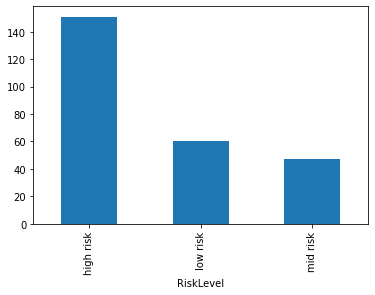

In [93]:
data[(data['Age'] >= 35)
     &((data['BS'] >= 7)
     |((data['SystolicBP'] > 139)
     &(data['DiastolicBP'] > 89)))].value_counts('RiskLevel').plot(kind = 'bar')

Возраст, высокое давление и сахарный диабет вместе способствуют высокому риску для здоровья (что и видно на графике). Еще первая сортировка показала нам, и график это подтверждает, что факторы риска взаимосвязаны друг с другом и увеличивают уровень риска. 

<AxesSubplot:>

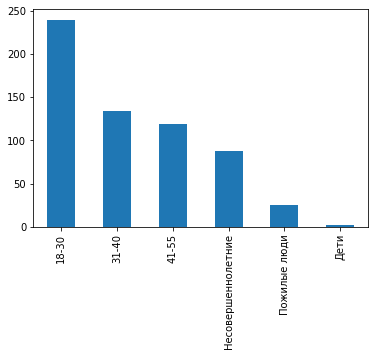

In [169]:
data[(data['RiskLevel'] == 'mid risk')
     |(data['RiskLevel'] == 'high risk')]['Age_periodization'].value_counts().plot(kind = 'bar')

Столбчатая диаграмма показала, как распределяется риски для здоровья (средний и высокий) по группам возрастов. Наиболее часто риски диагностируют беременным от 18 до 30 лет. Интересно, что за ними идут несовершеннолетние, а риск у возрастов 41-55 и 31-40 находятся примерно на одном уровне. Получается, что возраст сам по себе (как и температура) не всегда является фактором риска. Он идет в сочетании с другими факторами, а бОльшее влияние имеют другие показатели.  

<AxesSubplot:>

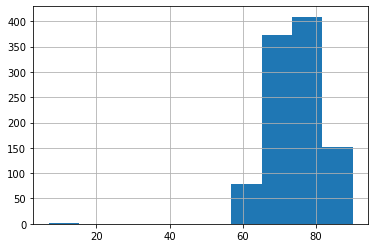

In [95]:
data['HeartRate'].hist()

Мы до этого не рассматривали переменную частоты сердечных сокращений, однако с помощью гистограммы распределений мы можем предположить, что этот фактор не несет за собой риска: сердечные сокращения находятся в норме (до 100). 

<AxesSubplot:>

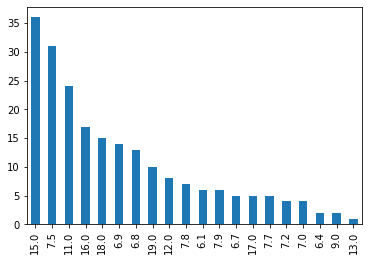

In [107]:
data[(data['Age_periodization'] == '41-55') 
     | (data['Age_periodization'] == 'Пожилые люди')]['BS'].value_counts().plot(kind = 'bar')

Раннее мы говорили о том, что с возрастом у женщин может развиться диабет. Посмотрев, какой уровень сахара у женщин в возрасте 41-55 и пожилых людей, мы увидели, что в распределении встречаются высокие показатели сахара (самая высокая точка - 15.0, это сахарный диабет). При этом крайне мало нормальных показателей. Это говорит о том, что у беременных в данных возрастных периодах есть диабет, а значит, и риск для здоровья. 

## МЦТ и описательные статистики

### Риски для здоровья

Возьмем перекодированную переменную рисков для здоровья, и так как это порядковая переменная, мы можем посчитать только медиану и моду

In [110]:
data['Risk_range'].median()

1.0

50% пациентам ставят средний уровень риска для здоровья. 

In [111]:
data['Risk_range'].mode()

0    0
dtype: int64

Чаще всего в данных встречается легкий уровень риска для здоровья.

### Уровень сахара

In [117]:
data['BS'].mean()

8.725986193293886

Средний уровень сахара среди пациентов - 8,7 с округлением (это высокий показатель, говорящий о диабете)

In [118]:
data['BS'].median()

7.5

У 50% пациенток уровень сахара составляет 7.5

In [119]:
data['BS'].mode()

0    7.5
dtype: float64

Чаще всего в данных встречается показатель уровня сахара в 7.5 ммоль/л. Видим, что в распределении много высоких показателей, значит, сахарный диабет распространен среди беременных в нашем датасете. 

In [120]:
data['BS'].max()

19.0

Максимальный уровень сахара - 19 ммоль/л.

In [149]:
data[data['BS'] == data['BS'].max()][['RiskLevel', 'SystolicBP']].value_counts()

RiskLevel  SystolicBP
high risk  140           10
           160           10
           85             2
dtype: int64

При этом мы видим, что всем пациентам с максимальным для нашего датасета уровнем сахара ставят высокие риски для здоровья, и у них высокое систолическое давление

In [121]:
data['BS'].min()

6.0

Минимальный уровень сахара - 6 ммоль/л.

In [145]:
data[data['BS'] == data['BS'].min()]['RiskLevel'].value_counts()

mid risk    14
low risk     7
Name: RiskLevel, dtype: int64

Интересно, что с минимальным уровнем сахара пациенткам ставят как низкий риск для здоровья, так и средний.

In [122]:
data['BS'].std()

3.293531721151271

Среднеквадратичное отклонение равно 3.29 с округлением. В среднем распределение отклоняется от среднего арифметического на 3.29

Расчёт МЦТ и описательных статистик показал, что в нашем датасете высокие показатели уровня сахара, что является риском для беременных. Профилактические меры: следить за уровнем сахара в крови и предпринимать соответствующие меры.

### Температура тела (по Цельсия)

In [123]:
data['BodyTemp_C'].mean()

37.03852071005854

Средняя температура среди пациентов - 37 градусов с округлением. 

In [124]:
data['BodyTemp_C'].median()

36.67

50% пациенток температура 36.67

Рассмотрим распределение этой переменной на гистограмме

<AxesSubplot:>

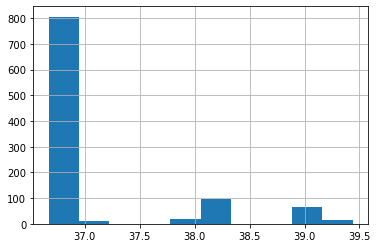

In [150]:
data['BodyTemp_C'].hist()

Большинство значений находятся в промежутке от 36.6 и до 37 градусов. Высоких температур очень мало, но они как раз и смещают среднее арифметическое вправо, и оно немного отличается от медианы и моды. 

In [125]:
data['BodyTemp_C'].mode()

0    36.67
dtype: float64

Чаще всего в данных встречается температура 36.67

In [126]:
data['BodyTemp_C'].max()

39.44

Максимальная температура 39.44 градусов. 

In [151]:
data[data['BodyTemp_C'] == data['BodyTemp_C'].max()]['RiskLevel'].value_counts()

high risk    6
low risk     5
mid risk     2
Name: RiskLevel, dtype: int64

По данной частотной таблице можем заметить, что максимальная температура для нашего датасета встречается лишь 13 раз из 1014, это хорошие показатели. При этом даже с высокой температурой пациентам ставили низкий уровень риска (5) или высокий уровень (6). По предшествующим результатам, можем сказать о том, что температура не является серьезным фактором риска в одиночку, только в сочетании с другими факторами.

In [127]:
data['BodyTemp_C'].min()

36.67

Минимальное значение температуры составляет 36.67 градусов 

In [158]:
# Первый квартиль
np.percentile(data['BodyTemp_C'], 25) 

36.67

In [159]:
# Третий квартиль
np.percentile(data['BodyTemp_C'], 75) 

36.67

Интересно, что показатели первого и третьего квартиля (а также медианы) равны. Получается, что высоких температур крайне мало и они сосредоточены в последних 25% распределения.

### Возраст 

In [128]:
data['Age'].mean()

29.871794871794872

Средний возраст среди пациентов равен примерно 3о с округлением. 

In [129]:
data['Age'].median()

26.0

50% пациентов младще 26 лет.

In [130]:
data['Age'].mode()

0    23
dtype: int64

Чаще всего в датасете встречается возраст 23 года. 

<AxesSubplot:>

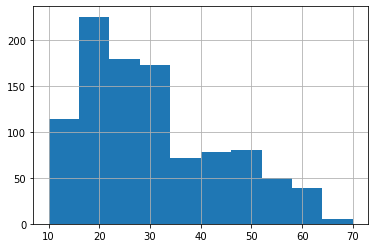

In [153]:
data['Age'].hist()

В датасете чаще встречается возраст от примерно 18 до 35, при этом есть пациентки и более старшего возраста. За счёт этого мы в очередной раз наблюдаем, как среднее арифметическое немного скошено вправо, то есть в бОльшую сторону. 

In [131]:
data['Age'].max()

70

Самой старшей пациентке 70 лет. 

In [132]:
data['Age'].min()

10

Самой младшей пациентке 10 лет.

In [133]:
data['Age'].std()

13.474385532634383

В среднем возраст пациенток отклоняется от среднего на 13,47

Расчет МЦТ и описательных статистик подтвердил результаты, полученные путем сортировки и частотных таблиц.

### Верхнее значение артериального давления

В случае с беременностью важнее именно верхнее значение, то есть систолическое давление, сила, с которой насыщенная кислородом кровь выталкивается из сердца и расходится по телу, и, следовательно, попадает к малышу. Высоким систолическим давлением считается давление выше 140 мм рт ст

In [134]:
data['SystolicBP'].mean()

113.19822485207101

Среднее верхнее значение арт. давления равно 113.2 мм.рт.ст. с округлением.

In [135]:
data['SystolicBP'].median()

120.0

50% пациентов имеют систолическое давление меньше 120 мм.рт.ст.

In [136]:
data['SystolicBP'].mode()

0    120
dtype: int64

Чаще всего в данных встречается систолическое давление в 120 мм.рт.ст.

<AxesSubplot:>

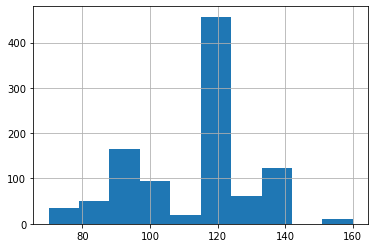

In [155]:
data['SystolicBP'].hist()

Интересно, что распределение по давлению отличается от предыдущих тем, что среднее арифметическое меньше других мцт, оно смещено влево из-за большого количества низких показателей давления. При этом много пациентов с нормальным давлением (120) и мало пациентов с высоким давлением. 

In [137]:
data['SystolicBP'].max()

160

Максимальное верхнее значение арт. давления составляет 160 мм.рт.ст.

In [162]:
data[data['SystolicBP'] == data['SystolicBP'].max()]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Risk_range,BodyTemp_C,Age_periodization
123,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
130,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
166,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
262,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
362,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
538,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
583,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
689,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
961,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40
994,40,160,100,19.0,98.0,77,high risk,2,36.67,31-40


Пациентки с максимальным для нашего датасета значением давления имеют схожие характеристики в нижнем значении арт.давления(100), возрасте (40 лет), в уровне сахара (19.0, это очень много) и даже в частоте сердечных сокращений (77, в норме). Это наводит на мысль, что все эти данные относятся скорее всего к одному человеку, произошла ошибка и данные были перезаписаны несколько раз.  

In [138]:
data['SystolicBP'].min()

70

Минимальное верхнее значение арт. давления составляет 70 мм.рт.ст.

In [164]:
data[data['SystolicBP'] == data['SystolicBP'].min()]['RiskLevel'].value_counts()

low risk    5
mid risk    2
Name: RiskLevel, dtype: int64

С минимальным значением систолического давления пациенткам ставили низкий уровень риска, хотя есть два исключения со средним уровнем риска. Рассмотрим эти две строки с данными, чтобы понять, что повлияло на этот диагноз. 

In [166]:
data[(data['SystolicBP'] == data['SystolicBP'].min())& (data['RiskLevel'] == 'mid risk')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Risk_range,BodyTemp_C,Age_periodization
661,15,70,50,6.0,98.0,70,mid risk,1,36.67,Несовершеннолетние
848,15,70,50,6.0,98.0,70,mid risk,1,36.67,Несовершеннолетние


Причиной среднего риска для здоровья стали низкие показатели давления по двум значениям давления и возраст пациенток (несовершеннолетние)

In [139]:
data['SystolicBP'].std()

18.403912756342805

В среднем верхнее значение арт. давления отклоняется от среднего арифметического на 18.4 с округлением. 

Расчёт МЦТ и описательных статистик для систолического давления в очередной раз доказал влияние давления на риск для здоровья беременных женщин.

## Выбросы

### Уровень сахара

**Ящик с усами**

<AxesSubplot:xlabel='BS'>

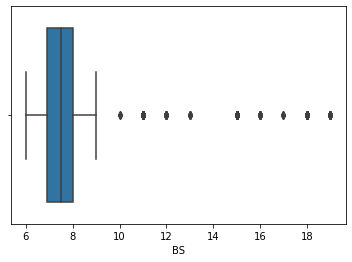

In [176]:
import seaborn as sns 
sns.boxplot(x=data['BS'])

На графике мы видим, что нижняя граница находится на 6, а верхняя примерно на 9. При этом значения сосредоточены в интервале от 7 до 8 (как и показали мцт), а выбросы находятся за верхней границей в интервале от 10 и до 19. 

**Интерквартильный размах**

In [178]:
q1 = np.percentile(data['BS'], 25)
q3 = np.percentile(data['BS'], 75)
iqr=q3-q1
# Нижняя граница
line_1 = q1 - 1.5*iqr
# Верхняя граница
line_2 =  q3 + 1.5*iqr
line_1, line_2

(5.250000000000001, 9.649999999999999)

Мы получили значения верхней и нижней границ, теперь посмотрим на выбросы после границ. 

In [180]:
data[data['BS'] < line_1].shape[0]

0

За нижней границей выбросов нет. 

In [181]:
data[data['BS'] > line_2].shape[0]

210

Выбросов за верхней границей 210 

**Среднеквадратичное отклонение**

In [182]:
mean = data['BS'].mean()
std = data['BS'].std(ddof=0)
# Нижняя граница
line1 = mean - 2.5*std
# Верхняя граница
line2 = mean + 2.5*std
print(line1, line2)

0.496217965534699 16.955754421053072


Мы получили значения верхней и нижней границ, теперь посмотрим на выбросы после границ. При этом интересно сразу отметить, что границы, по сравнению с расчетом по размаху, сместились. Соответственно выбросов может стать меньше. 

In [183]:
data[data['BS'] < line1].shape[0]

0

За нижней границей выбросов опять нет. 

In [184]:
data[data['BS'] > line2].shape[0]

56

А выбросов за верхней границей, как и ожидалось, стало меньше (56 штук, а не 210)

## Замена выбросов 

Заменим выбросы по переменной на среднее арифметическое и сравним показатели мцт. Создадим для этого новую переменную.

In [195]:
data['BS_mean'] = data['BS'].apply(lambda x: data['BS'].mean() if x>line_1 else x)

In [196]:
data['BS_mean'].mean()

8.725986193293743

In [197]:
data['BS_mean'].median()

8.725986193293886

In [198]:
data['BS_mean'].mode()

0    8.725986
dtype: float64

Показатели МЦТ при замене выбросов на среднее арифметическое стали одинаковыми. 

## Пропущенные значения

In [86]:
data.isna().sum()

Age                  0
SystolicBP           0
DiastolicBP          0
BS                   0
BodyTemp             0
HeartRate            0
RiskLevel            0
Risk_range           0
BodyTemp_C           0
Age_periodization    0
dtype: int64

Пропущенных значений в нашем датасете нет. 

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1014 non-null   int64  
 1   SystolicBP         1014 non-null   int64  
 2   DiastolicBP        1014 non-null   int64  
 3   BS                 1014 non-null   float64
 4   BodyTemp           1014 non-null   float64
 5   HeartRate          1014 non-null   int64  
 6   RiskLevel          1014 non-null   object 
 7   Risk_range         1014 non-null   int64  
 8   BodyTemp_C         1014 non-null   float64
 9   Age_periodization  1014 non-null   object 
 10  BS_mean            1014 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 87.3+ KB


In [215]:
'None' in data.iloc[:, 0:11] 

False

In [157]:
data.iloc[:, 0:11]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_periodization,diabetes
0,25,130,80,15.0,98.0,86,high risk,18-30,1
1,35,140,90,13.0,98.0,70,high risk,31-40,1
2,29,90,70,8.0,100.0,80,high risk,18-30,1
3,30,140,85,7.0,98.0,70,high risk,18-30,1
4,35,120,60,6.1,98.0,76,low risk,31-40,0
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,18-30,1
1010,55,120,90,18.0,98.0,60,high risk,41-55,1
1011,35,85,60,19.0,98.0,86,high risk,31-40,1
1012,43,120,90,18.0,98.0,70,high risk,41-55,1


In [216]:
'none' in data.iloc[:, 0:11]

False

In [217]:
'Nan' in data.iloc[:, 0:11]

False

Используя несколько способов, мы точно можем сказать, что пропусков в нашем датасете нет.
Но давайте их искусственно создадим. Для этого нам нужна новая переменная, в которой мы уберем последние 140 значений из переменной уровня сахара в крови. 

In [5]:
data['BS_new'] = data['BS'].iloc[0:874]

Пропусков получилось не так много, поэтому мы можем либо заменить пропуски одной из мцт, заполнить случайными данными, используя модуль random, или можно попробовать группировку по возрасту и вставить в пропуски те значения, которые встречаются у того или иного возраста. (И нам кажется, что это наиболее правильный вариант, так как уровень сахара у 50-летней женщины будет неправильно заменить, например, на медиану, хотя средни 50-летних распространен сахарный диабет, что мы и увидели на частотных таблицах)

# Этап 3

## Корреляция

Мы будем рассчитывать корреляции по тем переменным, вокруг которых строились гипотезы. 

**Возраст и систолическое давление**

Предполагаем, что систолическое давление зависит от возраста: чем больше возраст, тем больше и давление. 

In [5]:
data['Age'].corr(data['SystolicBP'])

0.4160454479747331

Коэффициент корреляции между переменными равен примерно 0.42. Связь между переменными умеренная (будет небольшое выстраивание в линию на графике) и положительная (чем больше возраст, тем больше и давление). Наше предположение в какой-то степени подтвердилось. 

**Возраст и уровень глюкозы**

Предполагаем, что уровень глюкозы зависит от возраста: чем старше возраст, тем больше уровень глюкозы.

In [152]:
data['Age'].corr(data['BS'])

0.47328433592916785

Коэффициент корреляции между переменными равен примерно 0.47. Связь между переменными умеренная, а зависимость - положительная (чем старше возраст, тем больше уровень глюкозы). 

**Систолическое давление и уровень глюкозы**

Нам было интересно рассмотреть взаимосвязь между этими переменными. Медицинские источники подсказывают, что уровень глюкозы влияет на систолическое давление, ведь, если у человека есть сахарный диабет, у него повышено давление из-за проблем с кровеносными сосудами, в которых "остается" глюкоза.

In [7]:
data['BS'].corr(data['SystolicBP'])

0.42517165927101835

Коэффициент равен примерно 0.42. Между этими переменными также умеренная связь и положительная зависимость (чем больше уровень глюкозы, тем больше и давление).

##  Регрессия 

In [9]:
data[data['BS'] >= 7].shape[0]

691

691 пациенток из 1014 имеют высокий уровень глюкозы в крови. Этот показатель опасен для ребенка (задержка развития, преждевременное рождение и тд) и для матери (высокое давление). К тому же в ходе нашего анализа мы поняли, что уровень глюкозы - серьезный фактор риска, особенно в совокупности с другими признаками. Нам кажется полезным в качестве целевой переменной взять именно уровень глюкозы и рассмотреть, как на нее влияет возраст (берем эту переменную в качестве влияющего фактора). 

Почему возраст? Сахарный диабет есть как у молодых людей, так и более старших. Давление, наоборот, зависит от уровня глюкозы, температура - вспомогательный фактор, а сердцебиение, как мы выяснили, у всех пациентов находится в норме, соответственно, зависимость проводить не имеет смысла. 


*Интуиция зависимости*: зависимость положительная, чем больше возраст, тем больше и уровень глюкозы.

Тем не менее выдвинем несколько гипотез

*Гипотезы*: 

0 гипотеза: между возрастом и уровнем глюкозы зависимости не существует (на графике будет хаотичное распределение значений)

1 гипотеза: между возрастом и уровнем глюкозы будет положительная зависимость и сильная связь (эта гипотеза сопровождала наш анализ).  

2 гипотеза: между возрастом и уровнем глюкозы будет сильная отрицательная зависимость, чем меньше возраст, тем больше уровень глюкозы. Предполагаем и такой вариант, так как среди молодых сахарный диабет может преобладать чаще, чем среди более старших возрастов. 

3 гипотеза: между возрастом и уровнем глюкозы будет положительная зависимость, однако слабая или умеренная связь. 

Уравнение линейной регрессии выглядит следующим образом: Y = k*X+b, где Y - целевая переменная (в нашем случае уровень глюкозы), а X - предиктор (в нашем случае возраст)

In [11]:
X = data['Age']
Y = data['BS']

In [13]:
regress = scipy.stats.linregress(X, Y)
# Найдем коэффициент k(slope) и b(intercept)
regress.slope, regress.intercept

(0.11568445698183735, 5.270283824477463)

Наше уравнение приняло следующий вид: **Y = 0.11568445698183735*X + 5.270283824477463**

Попробуем спрогнозировать данные. Возьмем возраст пациента - 17 лет -  и рассчитаем по уравнению уровень глюкозы. 

In [149]:
y = 0.11568445698183735*17 + 5.270283824477463
print(y)

7.2369195931686985


При возрасте 17 лет уровень глюкозы будет равен 7.2. Это чуть выше порога (как мы помним, высокий уровень глюкозы это 7 и больше). 

Возьмем возраст постарше - 37 лет - и вновь рассчитаем уровень глюкозы. 

In [150]:
y = 0.11568445698183735*37 + 5.270283824477463
print(y)

9.550608732805445


При возрасте 37 лет уровень глюкозы будет равен 9.5. Видим, что с увеличением возраста увеличивается и уровень глюкозы, что подтверждает 1 гипотезу. 

Спрогнозируем теперь возраст, зная уровень глюкозы. Возьмем довольно высокий показатель - 15. 

In [151]:
x_predict = (15-5.270283824477463)/0.11568445698183735
print(x_predict)

84.10564763294103


Высокому уровню глюкозы (15) соответствует большой возраст (84 года). 

Теперь визуализируем график рассеяния этих переменных и линейную регрессию

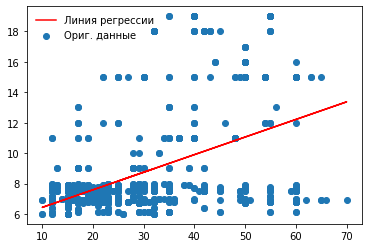

In [147]:
plt.scatter(X,Y, label = 'Ориг. данные')
plt.plot(X, regress.slope*X + regress.intercept, 'r', label = 'Линия регрессии')
plt.legend(frameon = False)
plt.show()

На первый взгляд, кажется, что зависимости между переменными нет (хаотичное распределение значений). Однако если посмотреть на линию регрессию и находящиеся рядом с ней значения, можно предрасположить, что зависимость линейная есть (небольшое выстраиваение в линию есть, нулевая гипотеза не подтвердилась), в верхней части графика хаотично распределены выбросы, которых в переменной достаточно много. Зависимость положительная (распределение идет слева направо, 2 гипотеза не подтвердилась), однако связь умеренная по графику и коэффициенту, который мы считали выше (1 гипотеза не подтвердилась). **Подтвердилась только 3 гипотеза**.  

## Визуализация

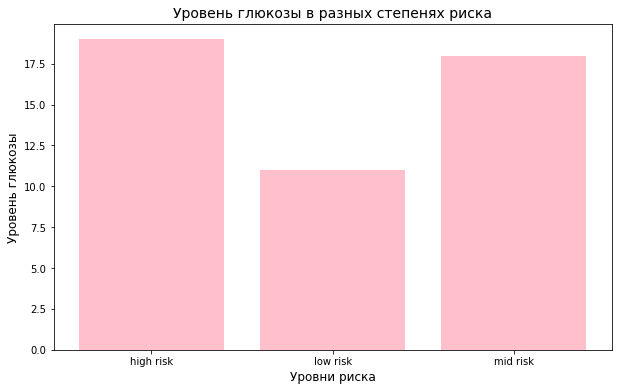

In [141]:
colors=['pink', 'blue', 'purple']
fig, ax = plt.subplots(figsize=[10,6])
plt.bar(data['RiskLevel'], data['BS'], color = 'pink')
ax.set_title('Уровень глюкозы в разных степенях риска', fontsize = 14)
ax.set_ylabel('Уровень глюкозы', fontsize=12)
ax.set_xlabel('Уровни риска', fontsize=12)
plt.show()

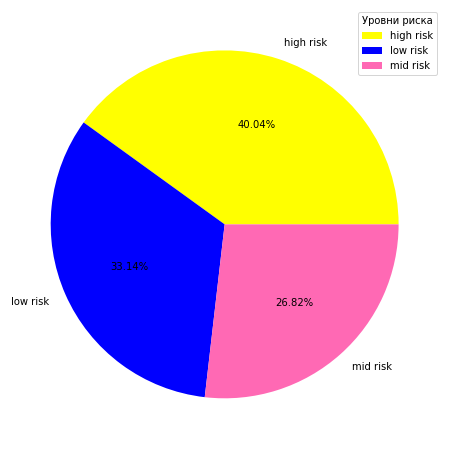

In [54]:
risk_level = data['RiskLevel'].unique()
fig, ax = plt.subplots(figsize=[10,8])
ax.pie(data['RiskLevel'].value_counts(), labels = risk_level, autopct='%.2f%%', colors=['yellow','blue','hotpink'])
ax.legend(title = 'Уровни риска')
plt.show()

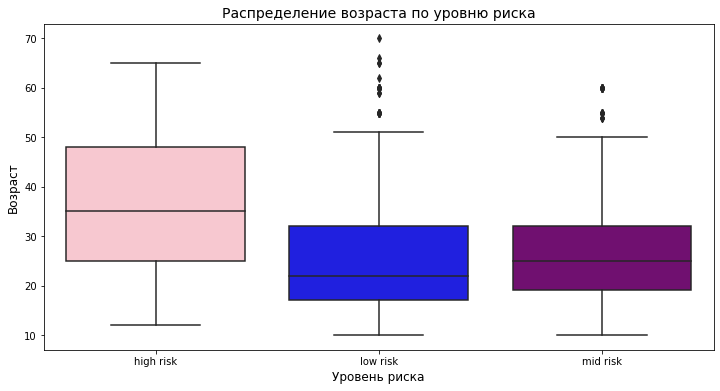

In [79]:
fig, ax = plt.subplots(figsize=[12,6])
sns.boxplot(x = data['RiskLevel'], y = data['Age'], palette = ['pink', 'blue', 'purple'])
ax.set_title('Распределение возраста по уровню риска', fontsize = 14)
ax.set_ylabel('Возраст', fontsize=12)
ax.set_xlabel('Уровень риска', fontsize=12)
plt.show()

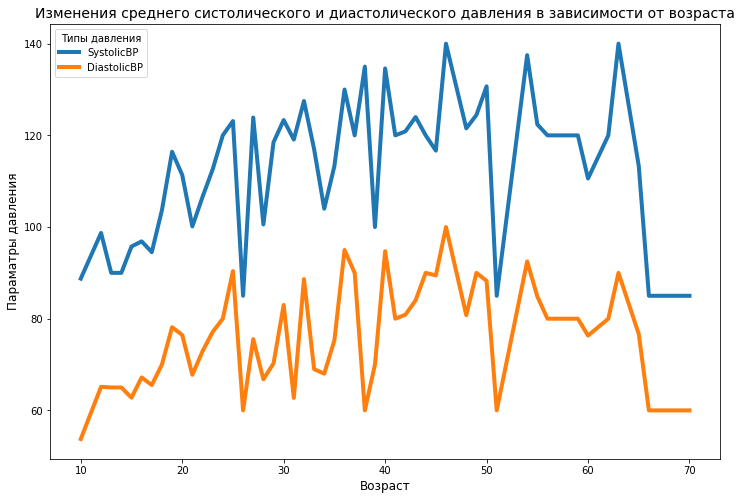

In [143]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(data.groupby('Age')[['SystolicBP', 'DiastolicBP']].mean(), label=['SystolicBP', 'DiastolicBP'], linewidth = 4)
ax.set_title('Изменения среднего систолического и диастолического давления в зависимости от возраста', fontsize = 14)
ax.set_ylabel('Параматры давления', fontsize=12)
ax.set_xlabel('Возраст', fontsize=12)
ax.legend(title = 'Типы давления')
plt.show()

Создадим новую бинарную переменную: если у человека есть сахарный диабет (уровень глюкозы >= 7), то будет 1, если нет, 0. 

In [94]:
data['diabetes'] = data['BS'].apply(lambda x: 1 if x>=7 else 0)

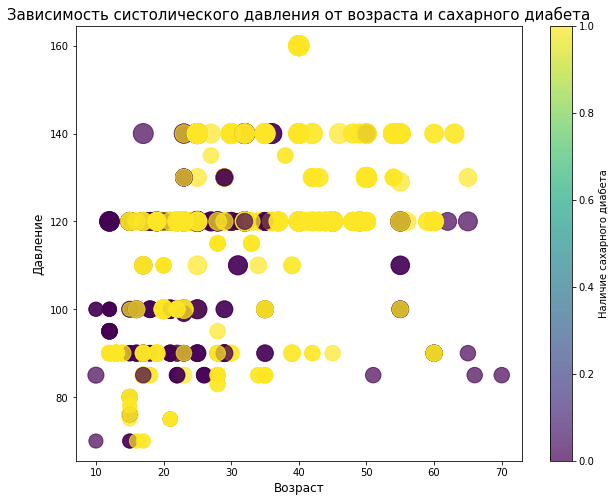

In [170]:
fig, ax = plt.subplots(figsize=[10,8])
graph = ax.scatter(data['Age'], y = data['SystolicBP'], c=data['diabetes'], s=data['DiastolicBP']*4, alpha=0.7)
plt.colorbar(graph, label = 'Наличие сахарного диабета')
ax.set_title('Зависимость систолического давления от возраста и сахарного диабета', fontsize=15)
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Давление', fontsize=12)
plt.show()

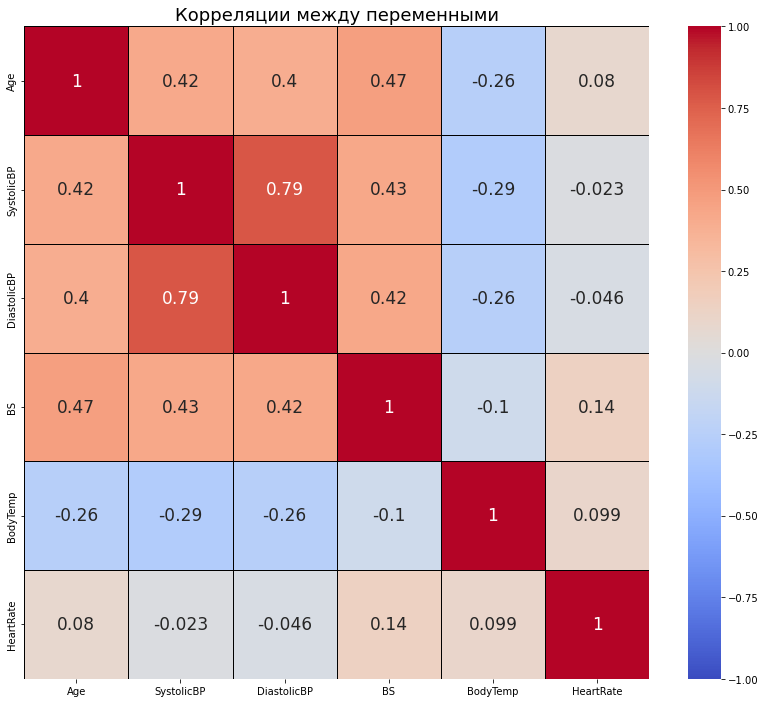

In [153]:
numeric_data = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].corr()
fig, ax = plt.subplots(figsize=[14,12])
ax.set_title('Корреляции между переменными', fontsize=18)
sns.heatmap(numeric_data, annot = True, linecolor = 'black', linewidth = 0.75, annot_kws = {'size': 17}, cmap= 'coolwarm', vmin=-1, vmax = 1)
plt.show()